# Aprendizado de máquina - Parte 1

- Subcampo da IA que tem por objetivo permitir que o computador _aprenda com os dados_ sem ser explicitamente programado. 
- Em linhas gerais, no _machine learning_ se constrói algoritmos que leem dados, aprendem com a "experiência" deles e inferem coisas a partir do conhecimento adquirido. 
- Área tem sido de grande valor por ser capaz de transformar dados aparentemente desconexos em informações cruciais para a tomada de decisões por meio do reconhecimento de padrões significativos.

## Modelagem e a subdivisão da área

- Os problemas fundamentais de ML em geral podem ser explicados por meio de _modelos_. Um modelo matemático (ou probabilístico) nada mais é do que uma relação entre variáveis. 

- As maiores classes de problemas de ML são:

- **Aprendizagem supervisionada (_supervised learning_)**
- **Aprendizagem não-supervisionada (_unsupervised learning_)**
- **Aprendizagem por reforço (_reinforcement learning_)** (não cobriremos)
, cujos algoritmos aprendem a partir de reforço para aperfeiçoar a qualidade de uma resposta explorando o espaço de solução iterativamente.

### Aprendizagem supervisionada (_supervised learning_)

- Aplicável a situações em que desejamos predizer valores. 
- Algoritmos aprendem a partir de um conjunto de treinamento rotulado (_labels_ ou _exemplars_) e procuram _generalizações_ para todos os dados de entrada possíveis. 
- Em problemas supervisionados, é necessário saber que dado fornece a "verdade fundamental" para que outros possam a ele ser comparados. Popularmente, este termo é chamado de _ground-truth_. 
- Exemplos: regressão logística (_logistic regression_), máquinas de vetor de suporte (_support vector machines_) e floresta aleatória (_random forest_).

### Aprendizagem não-supervisionada (_unsupervised learning_)

- Aplicável a situações em que desejamos explorar os dados para explicá-los. 
- Algoritmos aprendem a partir de um conjunto de treinamento não rotulado (_unlabeled_) e buscam _explicações_ a partir de algum critério estatístico, geométrico ou de similaridade. 
- Exemplos: clusterização por _k-means_ (_k-means clustering_ e núcleo-estimador da função densidade (_kernel density estimation_).

### Aprendizagem por reforço (_reinforcement learning_)

- Algoritmos aprendem a partir de reforço para aperfeiçoar a qualidade de uma resposta explorando o espaço de solução iterativamente.

- (Não cobriremos neste curso.)

### Tipos de problemas de aprendizagem supervisionada

- _classificação_, se a resposta procurada é discreta, isto é, se há apenas alguns valores possíveis para atribuição (p.ex. classificar se uma família é de baixa, média ou alta renda a partir de dados econômicos); 
- _regressão_, se a resposta procurada é contínua, isto é, se admite valores variáveis (p.ex. determinar a renda dos membros de uma família com base em suas profissões).

### Tipos de problemas de aprendizagem não supervisionada

- _clusterização_, se a resposta procurada deve ser organizada em vários grupos. A clusterização tem similaridades com o problema de classificação, exceto pelo desconhecimento _a priori_, de quantas classes existem;
- _estimativa de densidade_, se a resposta procurada é a explicação de processos fundamentais responsáveis pela distribuição dos dados.

### Quadro-resumo
<img src="../figs/13/visao-geral-ml.png" width=600px>

## Estudo de caso: classificação de empréstimos bancários

- Predizer se pedido de empréstimo será parcial ou totalmente aprovado por uma financeira. 
- Banco de dados disponível da financeira abrange 2007-2011.
- Aprovação do pedido baseia-se em análise de risco e informações (renda anual da pessoa, endividamento, calotes, taxa de juros do empréstimo, etc.) 

- Matematicamente, o pedido da pessoa será bem-sucedido se

$$\alpha = \frac{E - F}{E} \ge 0.95,$$

onde $E$ é o valor do empréstimo requisitado e $F$ o financiamento liberado. 

### Expressando o classificador

O classificador binário pode ser escrito pela função

$$h({\bf X}): \mathbb{M}_{n \, \times \, d} \to \mathbb{K},$$

com $\mathbb{K} = \{+1,-1\}$ e ${\bf X}$ é uma matriz de $n$ amostras e $d$ _features_ pertencente ao conjunto abstrato $\mathbb{M}_{n \, \times \, d}$.


In [16]:
import pickle # serialização de dados
import numpy as np
import matplotlib.pyplot as plt

Vamos ler o banco de dados.

In [20]:
import pickle
f = open('../database/dataset_small.pkl','rb')
# necessário encoding 'latin1'
(x,y) = pickle.load(f,encoding='latin1')

Aqui, `x` é a nossa matriz de features.

In [22]:
# 4140 amostras
# 15 features
x.shape

(4140, 15)

`y` é o vetor de _labels_

In [23]:
# 4140 targets +1 ou -1
y,y.shape

(array([ 1.,  1.,  1., ..., -1., -1., -1.]), (4140,))

Comentários: 
- As _features_ (atributos) são características que nos permitem distinguir um item. Neste exemplo, são todas as informações coletadas sobre a pessoa ou sobre o mecanismo de empréstimo. São 15, no total, com 4140 valores reais (amostras) cada.
- Em geral, uma amostra pode ser um documento, figura, arquivo de áudio, linha de uma planilha.
- _Features_ são geralmente valores reais, mas podem ser booleanos, discretos, ou categóricos.
- O vetor-alvo (_target_) contém valores que marcam se empréstimos passados no histórico da financeira foram aprovados ou reprovados.

### Interfaces do `scikit-learn`

Usaremos o módulo `scikit-learn` para resolver o problema. Este módulo usa três interfaces:

- `fit()` (estimador), para construir modelos de ajuste;
- `predict()` (preditor), para fazer predições;
- `transform()` (transformador), para converter dados;

O objetivo é predizer empréstimos malsucedidos, isto é, aqueles que se acham aquém do limiar de 95% de $\alpha$.

In [62]:
from sklearn import neighbors

# cria uma instância de classificação 
# 11 vizinhos mais próximos
nn = 11
knn = neighbors.KNeighborsClassifier(n_neighbors=nn)

# treina o classificador 
knn.fit(x,y)

# calcula a predição
yh = knn.predict(x)

# predição, real
y,yh

# altere nn e verifique diferenças
from numpy import size, where
size(where(y - yh == 0))

3443

> O algoritmo de classificação dos _K_ vizinhos mais próximos foi proposto em 1975. A base de seu funcionamento é a determinação do rótulo de classificação de uma amostra a partir de _K_ amostras vizinhas em um conjunto de treinamento.

#### Acurácia

Podemos medir o desempenho do classificador usando métricas. A métrica padrão para o método _KNN_ é a _acurácia_, dada por:

$$acc = 1 - erro = \frac{\text{no. de predições corretas}}{n}.$$

In [31]:
knn.score(x,y)

0.8316425120772947

Este _score_ parece bom, mas há o que analisar... Vamos plotar a distribuição dos rótulos.

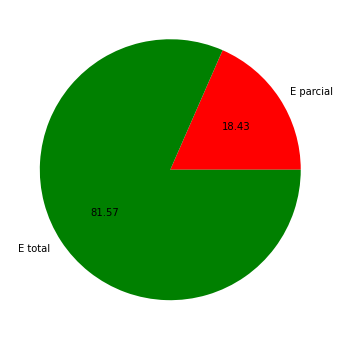

In [32]:
# gráfico "torta" (pie chart)
plt.pie(np.c_[np.sum(np.where(y == 1,1,0)),
             np.sum(np.where(y == -1,1,0))][0],
       labels=['E parcial','E total'],colors=['r','g'],
       shadow=False,autopct='%.2f')
plt.gcf().set_size_inches((6,6))

O gráfico mostra que o banco de dados está desequilibrado, já que 81,57% dos empréstimos foram liberados integralmente. Isso pode implicar que a predição será pela "maioria".

#### Matriz de confusão

- Há casos em que a acurácia não é uma boa métrica de desempenho. 
- Análises mais detalhadas necessárias => _matriz de confusão_. 
- Métricas para cenários distintos que levam em conta os valores obtidos pelo classificador e os valores considerados como corretos (_ground-truth_, isto é, o  "padrão-ouro" (_gold standard_). 

Em um classificador binário, há quatro casos a considerar, ilustrados na {numref}`matriz-confusao`:

- _Verdadeiro positivo_ (VP). O classificador prediz uma amostra como positiva que, de fato, é positiva.
- _Falso positivo_ (FP). O classificador prediz uma amostra como positiva que, na verdade, é negativa.
- _Verdadeiro negativo_ (VN). O classificador prediz uma amostra como negativa que, de fato, é negativa.
- _Falso negativo_ (FN). O classificador prediz uma amostra como negativa que, na verdade, é positiva.

<img src='../figs/13/matriz-confusao.png' width='300px'>

### Métricas

- _Acurácia_: $\text{acc} = \dfrac{TP + TN}{TP + TN + FP + FN}$

- _Recall_ (ou _sensibilidade_): $\text{rec} = \dfrac{TP}{TN + FP}$

- _Especificidade_: $\text{spec} = \dfrac{TN}{TN + FP}$

- _Precisão_ (ou _valor previsto positivo_): $\text{prec} = \dfrac{TP}{TP + FP}$

- _Valor previsto negativo_: $\text{npv} = \dfrac{TN}{TN + FN}$

- _F1-score_ (média harmônica entre _prec_ e _rec_): $F_1 = \dfrac{2 \, \text{prec}\, \text{rec}}{\text{prec} + \text{rec}}$

- Em geral, a escolha de um modelo envolve um _trade-off_ entre precisão e recall.
- Isto é, entre falsos positivos e falsos negativos. 

Podemos computar a matriz de confusão com

In [33]:
conf = lambda a,b: np.sum(np.logical_and(yh == a, y == b))
TP, TN, FP, FN = conf(-1,-1), conf(1,1), conf(-1,1), conf(1,-1)

np.array([[TP,FP],[FN,TN]])

array([[3370,  690],
       [   7,   73]])

ou, usando o `scikit-learn`, com

In [34]:
from sklearn import metrics
metrics.confusion_matrix(yh,y) # switch (prediction, target)

array([[3370,  690],
       [   7,   73]])

#### Conjuntos de treinamento e de teste

Vejamos um exemplo com `nn=1`.

In [37]:
knn = neighbors.KNeighborsClassifier(n_neighbors=1)
knn.fit(x,y)
yh = knn.predict(x)

metrics.accuracy_score(yh,y), metrics.confusion_matrix(yh,y)

(1.0,
 array([[3377,    0],
        [   0,  763]]))

#### Comentários

Este caso tem 100% de acurácia e uma matriz de confusão diagonal.  No exemplo anterior, não diferenciamos o conjunto usado para treinamento e predição. 

Porém, em problemas reais, as chances dessa perfeição ocorrer são minimas. Da mesma forma, o classificador em geral será aplicado em dados previamente desconhecidos. Esta condição força-nos a dividir os dados em dois conjuntos: aquele usado para aprendizagem (_conjunto de treinamento_) e outro para testar a acurácia (_conjunto de teste_.


Vejamos uma simulação mais realista.

In [44]:
# Randomiza e divide dados
# PRC*100% para treinamento
# (1-PRC)*100% para teste

PRC = 0.7
perm = np.random.permutation(y.size)
split_point = int(np.ceil(y.shape[0]*PRC))
X_train = x[perm[:split_point].ravel(),:]
y_train = y[perm[:split_point].ravel()]
X_test = x[perm[split_point:].ravel(),:]
y_test = y[perm[split_point:].ravel()]

In [45]:
aux = {'training': X_train,
       'training target':y_train,
       'test':X_test,
       'test target':y_test}

for k,v in aux.items():
    print(k,v.shape,sep=': ')

training: (2898, 15)
training target: (2898,)
test: (1242, 15)
test target: (1242,)


Agora treinaremos o modelo com esta nova partição.

In [47]:
knn = neighbors.KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train, y_train)
yht = knn.predict(X_train)

for k,v in {'acc': str(metrics.accuracy_score(yht, y_train)),
 'conf. matrix': '\n' + str(metrics.confusion_matrix(y_train, yht))}.items():
    print(k,v,sep=': ')

acc: 1.0
conf. matrix: 
[[2348    0]
 [   0  550]]


Para `nn = 1`, a acurácia é de 100%. Vejamos o que acontecerá nesta simulação com dados ainda não vistos.

In [50]:
yht2 = knn.predict(X_test)

for k,v in {'acc': str(metrics.accuracy_score(yht2, y_test)),
 'conf. matrix': '\n' + str(metrics.confusion_matrix(yht2, y_test))}.items():
    print(k,v,sep=': ')

acc: 0.7391304347826086
conf. matrix: 
[[858 153]
 [171  60]]


Neste caso, a acurácia naturalmente reduziu.